In [62]:
#数据的预处理
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from  sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm  import LGBMClassifier
from scipy.interpolate import lagrange
import seaborn as sns

In [63]:
#数据导入
filename = r'G:\科研\人工智能\机器学习\机器学习\data.csv'
data=pd.read_csv(filename,encoding='gbk')

In [64]:
#数据特粗略查看
data.head(5)     #显示前5行数据

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [65]:
data.tail(5) 

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
4749,11978,3269862,20180507120519228000000388247328,卡号1,0.05,0.68,1000,0.87,0.94,0.150,...,0.0,0.0,49200.0,78.0,1.0,1.0,49200.0,49200.0,44.0,58.0
4750,11986,270952,20180507114937914000000388192877,卡号1,0.01,0.99,400,0.93,0.98,0.605,...,5000.0,1952.0,10100.0,78.0,7.0,8.0,19200.0,7500.0,17.0,55.0
4751,11988,2425913,20180507121340509000000388278785,卡号1,0.00,1.00,3000,0.54,0.64,0.313,...,3300.0,1540.0,7600.0,79.0,8.0,8.0,21000.0,7250.0,18.0,55.0
4752,11991,471395,20180504161827128000000381357758,卡号1,0.05,0.95,0,4.79,1.00,0.458,...,1900.0,1216.0,7100.0,79.0,8.0,11.0,12000.0,3950.0,55.0,16.0
4753,11992,1881943,20180507124243041000000388391027,卡号1,0.01,0.99,1300,21.35,1.00,0.372,...,4000.0,2180.0,4500.0,74.0,5.0,5.0,7800.0,4360.0,20.0,54.0


In [66]:
data.columns 

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

In [67]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [68]:
data_final=data.drop(['Unnamed: 0','custid','trade_no','id_name','latest_query_time','loans_latest_time','bank_card_no','source'], axis=1)
data_final.shape
for cl in data_final.columns:
    count = data_final[cl].count()
    if len(list(data_final[cl].unique())) in [1, count, count-1]:
        data_final.drop(cl, axis=1, inplace=True)

In [69]:
data_final['reg_preference_for_trad'].replace({'一线城市':1,'二线城市':2,'三线城市':3,'境外':4,'其他城市':5},inplace=True)
data_final.dtypes
data_final['student_feature'] = data_final['student_feature'].fillna(0)

In [70]:
# 使用中位数进行插值
data_final.fillna(data_final.median(), inplace=True)

In [71]:
print(data_final)

      low_volume_percent  middle_volume_percent  \
0                   0.01                   0.99   
1                   0.02                   0.94   
2                   0.04                   0.96   
3                   0.00                   0.96   
4                   0.01                   0.99   
5                   0.02                   0.98   
6                   0.02                   0.98   
7                   0.02                   0.98   
8                   0.03                   0.65   
9                   0.01                   0.99   
10                  0.01                   0.99   
11                  0.01                   0.99   
12                  0.00                   0.73   
13                  0.01                   0.79   
14                  0.01                   0.89   
15                  0.01                   0.99   
16                  0.02                   0.98   
17                  0.02                   0.98   
18                  0.01       

In [77]:
# 将object类型转成folat
data_final=data_final.convert_objects(convert_numeric=True)
"""4. 数据划分"""
X = data_final.drop(["status"],axis=1)
Y = data_final["status"]
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=2018)
print(X_train.shape)
print(X_test.shape)
from sklearn.preprocessing import minmax_scale
# 归一化，缩放到0-1
standardScaler = StandardScaler()
X_train_fit = standardScaler.fit_transform(X_train)
X_test_fit = standardScaler.transform(X_test)

(3327, 81)
(1427, 81)


D:\ac\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [79]:
data_train = data_final['status']
def CalcIV(Xvar,Yvar):
    N_0=np.sum(Yvar==0)
    N_1=np.sum(Yvar==1)
    N_0_group=np.zeros(np.unique(Xvar).shape)
    
    N_1_group=np.zeros(np.unique(Xvar).shape)
    for i in range(len(np.unique(Xvar))):
        N_0_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==0)].count()
        N_1_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==1)].count()
    iv = np.sum((N_0_group/N_0-N_1_group/N_1)*np.log((N_0_group/N_0)/(N_1_group/N_1)))
    if iv>=1.0:
        iv=1
    return iv

def caliv_batch(df,Yvar):
    ivlist=[]
    for col in df.columns:
        iv=CalcIV(df[col],Yvar)
        ivlist.append(iv)
    names=list(df.columns)
    iv_df=pd.DataFrame({'Var':names,'Iv':ivlist},columns=['Var','Iv'])

    return iv_df,ivlist
im_iv, ivl = caliv_batch(data_final,data_train)
print(im_iv,ivl)

D:\ac\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\ac\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


                                      Var        Iv
0                      low_volume_percent  1.000000
1                   middle_volume_percent  1.000000
2   take_amount_in_later_12_month_highest  1.000000
3       trans_amount_increase_rate_lately  1.000000
4                    trans_activity_month  1.000000
5                      trans_activity_day  1.000000
6                              transd_mcc  1.000000
7              trans_days_interval_filter  1.000000
8                     trans_days_interval  1.000000
9                       regional_mobility  0.007948
10                        student_feature  0.000956
11                   repayment_capability  1.000000
12                           is_high_user  0.005614
13              number_of_trans_from_2011  1.000000
14                 first_transaction_time  1.000000
15                historical_trans_amount  1.000000
16                   historical_trans_day  1.000000
17                      rank_trad_1_month  0.128150
18          

In [80]:
# Lr
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# SVM
#LinearSVC = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train)
# decision tree
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train, y_train)
# xgboost
xgbClassifier = XGBClassifier()
xgbClassifier.fit(X_train, y_train)
# lightgbm
lgbmClassifier = LGBMClassifier()
lgbmClassifier.fit(X_train, y_train)


D:\ac\anaconda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

[准确率] 训练集： 0.7493 测试集： 0.7484
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.5908 测试集： 0.5778


D:\ac\anaconda\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ac\anaconda\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ac\anaconda\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ac\anaconda\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


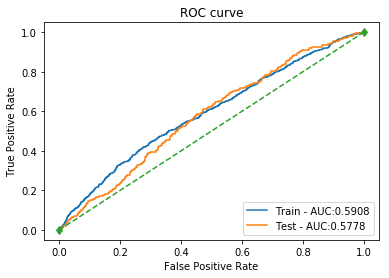

[准确率] 训练集： 0.8350 测试集： 0.7421
[精准率] 训练集： 0.7496 测试集： 0.4825
[召回率] 训练集： 0.5132 测试集： 0.3454
[f1-score] 训练集： 0.6093 测试集： 0.4026
[auc值] 训练集： 0.8329 测试集： 0.6970


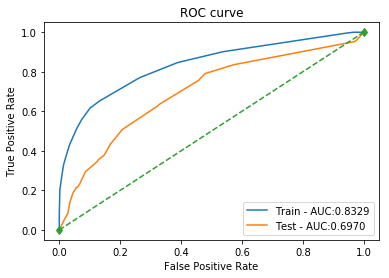

[准确率] 训练集： 0.8509 测试集： 0.7800
[精准率] 训练集： 0.8611 测试集： 0.6142
[召回率] 训练集： 0.4832 测试集： 0.3370
[f1-score] 训练集： 0.6190 测试集： 0.4353
[auc值] 训练集： 0.9166 测试集： 0.7739


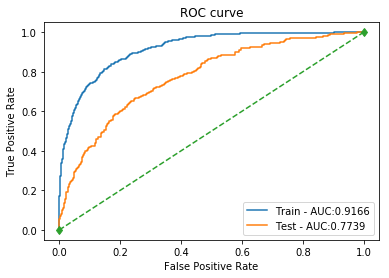

[准确率] 训练集： 0.9940 测试集： 0.7737
[精准率] 训练集： 0.9988 测试集： 0.5826
[召回率] 训练集： 0.9772 测试集： 0.3538
[f1-score] 训练集： 0.9879 测试集： 0.4402
[auc值] 训练集： 0.9999 测试集： 0.7650


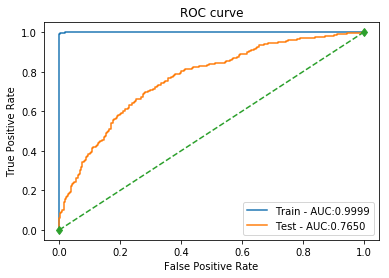

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_train_proba = clf.predict_proba(X_train)[:, 1]
    y_test_proba = clf.predict_proba(X_test)[:, 1]

    # 准确率
    print('[准确率]', end=' ')
    print('训练集：', '%.4f' % accuracy_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % accuracy_score(y_test, y_test_pred))

    # 精准率
    print('[精准率]', end=' ')
    print('训练集：', '%.4f' % precision_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end=' ')
    print('训练集：', '%.4f' % recall_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % recall_score(y_test, y_test_pred))

    # f1-score
    print('[f1-score]', end=' ')
    print('训练集：', '%.4f' % f1_score(y_train, y_train_pred), end=' ')
    print('测试集：', '%.4f' % f1_score(y_test, y_test_pred))

    # auc取值：用roc_auc_score或auc
    print('[auc值]', end=' ')
    print('训练集：', '%.4f' % roc_auc_score(y_train, y_train_proba), end=' ')
    print('测试集：', '%.4f' % roc_auc_score(y_test, y_test_proba))

    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label=1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label=1)

    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)),
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train, tpr_train)
    plt.plot(fpr_test, tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc=4)
    plt.title("ROC curve")
    plt.show()


if __name__ == "__main__":

    model_metrics(log_reg, X_train, X_test, y_train, y_test)

    model_metrics(dtree, X_train, X_test, y_train, y_test)

    #model_metrics(LinearSVC, X_train, X_test, y_train, y_test)

    model_metrics(xgbClassifier, X_train, X_test, y_train, y_test)

    model_metrics(lgbmClassifier, X_train, X_test, y_train, y_test)



袋外分数： 0.789600240456868
[准确率] 训练集： 0.8197 测试集： 0.7870
[精准率] 训练集： 0.8980 测试集： 0.7570
[召回率] 训练集： 0.3165 测试集： 0.2256
[f1-score] 训练集： 0.4681 测试集： 0.3476
[auc值] 训练集： 0.8986 测试集： 0.7755


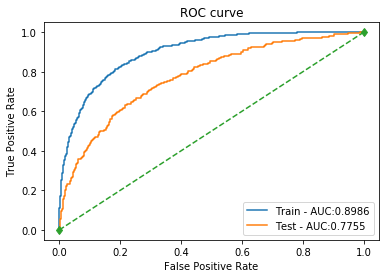

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2333)
rf.fit(X_train, y_train)
print('袋外分数：', rf.oob_score_)
model_metrics(rf, X_train, X_test, y_train, y_test)
feature_importance1 = sorted(zip(map(lambda x: '%.4f'%x, rf.feature_importances_), list(X_train.columns)), reverse=True)

In [85]:
feature_importance1

[('0.1360', 'trans_fail_top_count_enum_last_1_month'),
 ('0.1116', 'history_fail_fee'),
 ('0.0799', 'loans_score'),
 ('0.0546', 'apply_score'),
 ('0.0466', 'loans_overdue_count'),
 ('0.0443', 'latest_one_month_fail'),
 ('0.0277', 'trans_fail_top_count_enum_last_6_month'),
 ('0.0214', 'trans_fail_top_count_enum_last_12_month'),
 ('0.0200', 'latest_one_month_suc'),
 ('0.0196', 'max_cumulative_consume_later_1_month'),
 ('0.0181', 'rank_trad_1_month'),
 ('0.0173', 'trans_day_last_12_month'),
 ('0.0160', 'trans_amount_3_month'),
 ('0.0137', 'consfin_avg_limit'),
 ('0.0125', 'history_suc_fee'),
 ('0.0123', 'latest_query_day'),
 ('0.0101', 'historical_trans_day'),
 ('0.0101', 'avg_price_last_12_month'),
 ('0.0094', 'historical_trans_amount'),
 ('0.0094', 'consume_top_time_last_1_month'),
 ('0.0091', 'loans_settle_count'),
 ('0.0090', 'loans_avg_limit'),
 ('0.0087', 'trans_days_interval'),
 ('0.0084', 'loans_latest_day'),
 ('0.0082', 'latest_six_month_loan'),
 ('0.0081', 'consfin_credit_limit'